## 作業:
今天學到不同統計量之間特性，  
試著分析男生女生身高資料，  
試著回答下面的問題:  
Q1:試著用今天所教的內容，如何描述這兩組資料的樣態?    
Q2: 請問男生和女生在平均身高上誰比較高?   
Q3:請問第二題的答案和日常生活中觀察的一致嗎? 如果不一致，你覺得原因可能為何?    
上述問題透過  python 語法進行運算，
並將上述答案填寫在 (google 表單)[https://docs.google.com/forms/d/e/1FAIpQLSdDzwpeJl8YLPwZaW8pBZvtuXY9kIbbZLqxcXyzFaoraV5JEA/viewform ]
![](./D27_image.PNG)

In [1]:
# library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics
import seaborn as sns

In [2]:
## 輸入資料
male=[164,175,183,173,
      176,159,165,165,
      169,151,156,163,
      169,144,170,177,
      165,160,164,171]

female=[169,170,162,154,
        183,173,169,167,
        170,185,162,175,
        168,151,181,170,
        182,156,159,160]

In [3]:
#Q1:試著用今天所教的內容，如何描述這兩組資料的樣態?
#暗示:  分別計算男生和女生的統計量

#創建Dataframe表格,轉換資料為nparray的二維串列
df = pd.DataFrame(index=['Male','Female'])
data=[np.array(male),np.array(female)]
#填入統計數據
#平均數,中位數,眾數,全距,平均差,方差,標準差,離散係數
df['Mean']=list(map(np.mean, data))
df['Median']=list(map(np.median, data))
df['Mode']=list(map(lambda x : int(stats.mode(x)[0]), data))
df['Range']=list(map(lambda x : max(x) - min(x), data))
df['MAD(mean)']=list(map(lambda x : sum(abs(x-np.mean(x)))/ len(x), data))
df['MAD(median)']=list(map(lambda x : sum(abs(x - np.median(x)))/ len(x), data))
df['MAD(mode)']=list(map(lambda x : sum(abs(x - int(stats.mode(x)[0]))) / len(x), data))
df['Variance']=list(map(np.var, data))
df['STD']=list(map(np.std, data))
df['CV']=list(map(lambda x: np.std(x) / np.mean(x), data))
df['Skewness']=list(map(stats.skew, data))
df['Kurtosis']=list(map(stats.kurtosis, data))
display(df)

,Mean,Median,Mode,Range,MAD(mean),MAD(median),MAD(mode),Variance,STD,CV,Skewness,Kurtosis
Male,165.95,165.0,165,39,6.945,6.85,6.85,80.6475,8.980395,0.054115,-0.471321,0.193959
Female,168.30,169.0,170,34,7.570,7.50,7.60,90.6100,9.518929,0.056559,0.059853,-0.820361


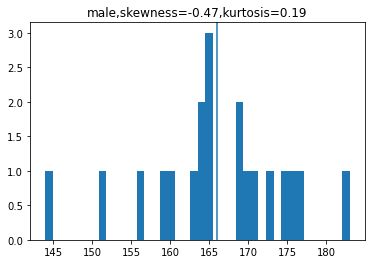

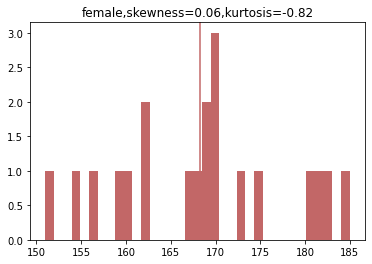

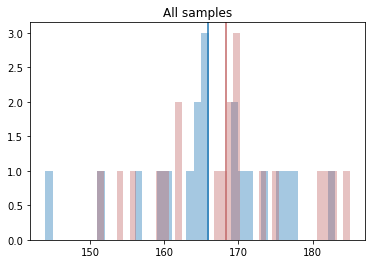

In [4]:
# 畫圖看分布
# 男性
plt.hist(male,bins=df['Range'][0] + 1)
plt.title('male,skewness={0},kurtosis={1}'.format(round(df['Skewness'][0],2),round(df['Kurtosis'][0],2)))
plt.axvline(x=df['Mean'][0])
plt.show()

# 女性
plt.hist(female,bins=df['Range'][1] + 1,color=sns.desaturate("indianred", .8))
plt.title('female,skewness={0},kurtosis={1}'.format(round(df['Skewness'][1],2),round(df['Kurtosis'][1],2)))
plt.axvline(x=df['Mean'][1],color=sns.desaturate("indianred", .8))
plt.show()

# 把樣本放在一起比較
kwargs = dict(alpha=0.4, bins=max(df['Range']))
plt.hist(male,**kwargs)
plt.hist(female,color=sns.desaturate("indianred", .8),**kwargs)
plt.title("All samples")
plt.axvline(x=df['Mean'][0])
plt.axvline(x=df['Mean'][1],color=sns.desaturate("indianred", .8))
plt.show()

## Q2: 請問男生和女生在平均身高上誰比較高? 
### &emsp;&emsp;Ans: 分別以平均數,中位數,眾數來看皆為女生較高

## Q3:請問第二題的答案和日常生活中觀察的一致嗎?</br>&emsp;&ensp;如果不一致，你覺得原因可能為何? 
### &emsp;&emsp;Ans: 不一致，根據統計部資料顯示，於2013~2016年間，成年男性平均身高</br>&emsp;&emsp;&emsp;&emsp;&nbsp;約為168cm，成年女性平均身高約為155cm，不一致的原因科能在於
### &emsp;&emsp;&emsp;&emsp;&nbsp;   1.樣本取的不夠多
### &emsp;&emsp;&emsp;&emsp;&nbsp;   2.在特定群體中取樣而造成取樣偏誤
### &emsp;&emsp;&emsp;&emsp;&nbsp;   3.母群體並非台灣成年男、女性